# Práctica 5 - Medidas de Centralidad

## Objetivo
En esta práctica se proponen dos redes sociales para las que se pide realizar un análisis de centralidad de los nodos. El objetivo principal es escoger la medida, o medidas de centralidad más idóneas para explicar la importancia de los nodos en cada red.

## 1 Red de football
La red “football98.net” representa a los 22 equipos internacionales de football que participaron en el campeonato mundial de París de 1998. Existe un arco dirigido del país A al país B cuando algún jugador de la selección del país A juega el resto del año en las competiciones del país B; el peso del lado corresponde al número de jugadores que el país A “exporta” al país B. Haga un estudio de centralidad de los países utilizando aquellas métricas que considere oportunas. En cada una caso, dibuje la red modificando el tamaño y/o el color de los nodos de acuerdo al ranking establecido, y comente brevemente el resultado.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


from io import StringIO

Funcion que devuelve un grafo dirigido de 22 equipos de fútbol que participaron en el Campeonato Mundial de París de 1998.


In [7]:
# Carga la red desde el archivo descargado
G = nx.read_pajek('football.net')

# Convierte la red a un DiGraph
G = nx.DiGraph(G)

El grafo dibujado sin atender ninguna centralidad: RED DE FOOTBALL


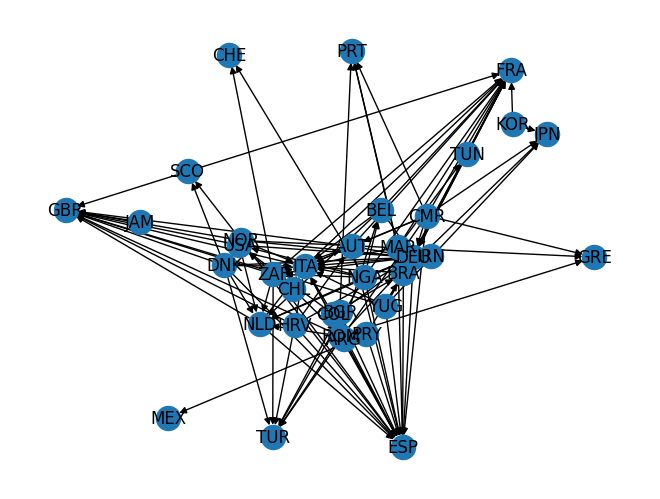

In [9]:
print("El grafo dibujado sin atender ninguna centralidad: RED DE FOOTBALL")
pos = nx.layout.fruchterman_reingold_layout(G,k=1,iterations=20)
nx.draw(G, with_labels=True)

#### Centralidad mediante grado de enlaces

En esta red centralizada por el grado, obtenemos que España, Italia y Alemania son los paises con mas jugadores con contratos en otros paises y viceversa. 
Por el contrario Jamaica, Mexico e Irán son los países con menos jugadores con contratos en otros paises.


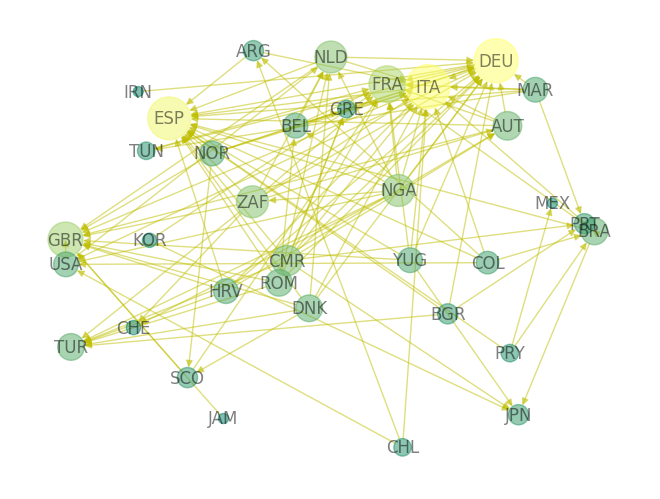

In [ ]:
cent = np.array(list(nx.degree_centrality(G).values()))
pos = nx.layout.fruchterman_reingold_layout(G,k=1,iterations=20)
nx.draw(G,pos,node_color=cent,with_labels=True, alpha=0.5, edge_color='y',node_size=cent*1800,cmap=plt.cm.summer)
print("En esta red centralizada por el grado, obtenemos que España, Italia y Alemania son los paises con mas jugadores con contratos en otros paises y viceversa. ")
print("Por el contrario Jamaica, Mexico e Irán son los países con menos jugadores con contratos en otros paises.")

#### Centralidad mediante PageRank

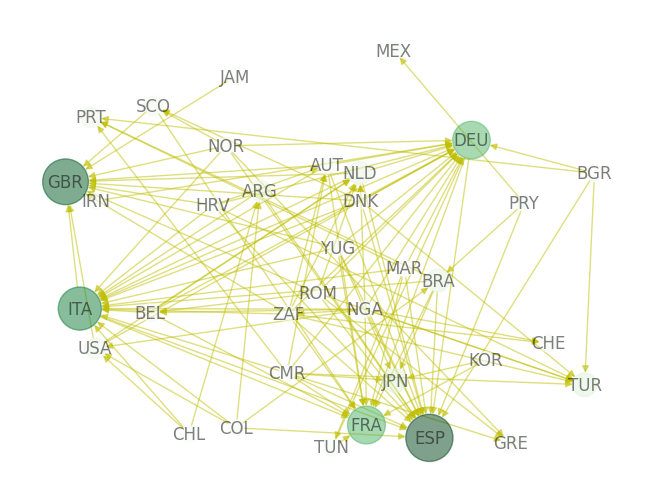

In [ ]:
cent2 = np.array(list(nx.pagerank(G).values()))
pos = nx.layout.fruchterman_reingold_layout(G,k=1,iterations=20)
nx.draw(G,pos,node_color=cent2,with_labels=True, alpha=0.5, edge_color='y',node_size=cent2*10000,cmap=plt.cm.Greens)

#### Centralidad mediante Hubs-Autorities (HITS)

C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\crist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:767: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


Con centralidad HITS los nodos tiene doble identidad, hubs y autoridaddes 
Como resultado obtenemos como Paises importantes: España y Reino Unido
Y como paises menos importantes: Yugoslavia, Jamaica, Mexico...


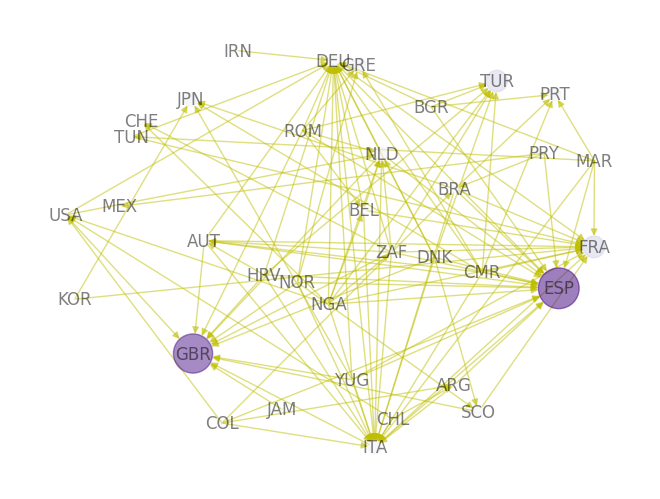

In [ ]:
hubs,autoridades = list(nx.hits(G))
ranking = [] #Lista con el ranking para los colores y el tamaño de los nodos

"Vamos a usar la formula F(A)= 2/(1/hubAj + 1/autAj)"
for e in hubs.values():
    ranking.append(e)
cont = 0

for e in autoridades.values():
    if e == 0:
        ranking[cont] = 2/(1/ranking[cont] + 0)
    elif ranking[cont] == 0:
        ranking[cont] = 2/(0 + 1/e)
    else:
        ranking[cont] = 2/(1/ranking[cont] + 1/e)
    cont+=1  

ranking = np.array(ranking)
   
pos=nx.layout.fruchterman_reingold_layout(G,k=1,iterations=20)
nx.draw(G,pos,node_color=ranking,with_labels=True, alpha=0.5, edge_color='y',node_size=ranking*2000,cmap=plt.cm.Purples)
print("Con centralidad HITS los nodos tiene doble identidad, hubs y autoridaddes ")
print("Como resultado obtenemos como Paises importantes: España y Reino Unido")
print("Y como paises menos importantes: Yugoslavia, Jamaica, Mexico...")


## 2 Red de familias florentinas del renacimiento
La función de Networkx florentine_families_graph crea una red de familias florentinas del renacimiento (Padgett). Se define un vínculo entre dos familias si existe algún matrimonio entre sus miembros. Haga un estudio de centralidad de las familias utilizando aquellas métricas que considere oportunas. Escoja aquella métrica de centralidad que mejor explique el poder de los Medici frente a la familia rival de los Pazzi, y dibuje la red modificando el tamaño y/o el color de los nodos de acuerdo al ranking establecido.


Este seria el grafo dibujado sin atender ninguna centralidad


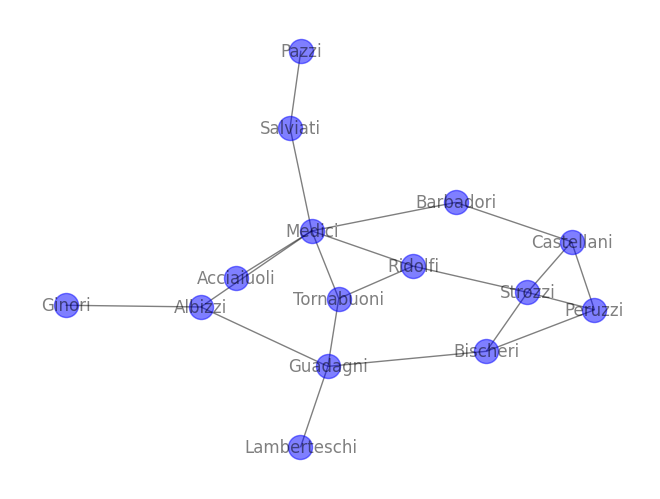

In [ ]:
G = nx.florentine_families_graph()
print("Este seria el grafo dibujado sin atender ninguna centralidad")
nx.draw(G,with_labels=True,node_color='b',alpha=0.5)

#### Centralidad mediante Eigenvector

In [ ]:
from networkx import eigenvector_centrality

Con la centralidad por Eigenvector se puede observar el ranking de familias importantes que tienen vínculos con otras familias importantes, concluyendo con la familia mas importante que seria la Medici y la menos importante que seria la Pazzi


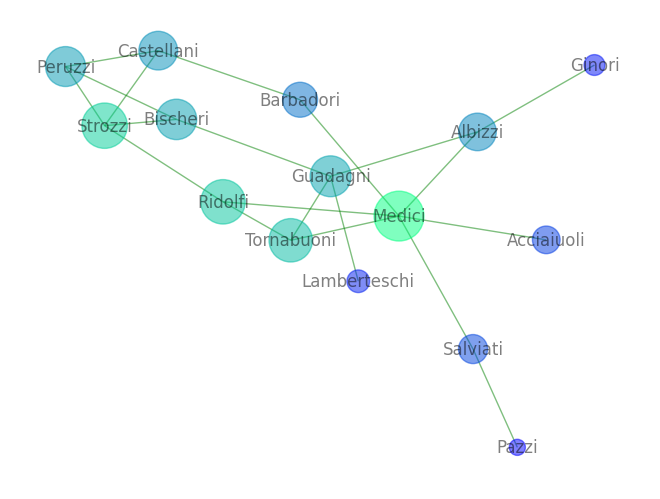

In [ ]:
imp = np.array(list(eigenvector_centrality(G).values()))
pos=nx.layout.fruchterman_reingold_layout(G)
nx.draw(G,pos,node_color=imp,with_labels=True, alpha=0.5, edge_color='g',node_size=imp*3000,cmap=plt.cm.winter)
print("Con la centralidad por Eigenvector se puede observar el ranking de familias importantes que tienen vínculos con otras familias importantes, concluyendo con la familia mas importante que seria la Medici y la menos importante que seria la Pazzi")